# CSE-221710313005-Akhila Shankar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
#Preprocessing steps:
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns) #scaling the data
df.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [7]:
df1=df.copy()
df1.drop('sales',axis=1,inplace=True)

In [8]:
df1.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

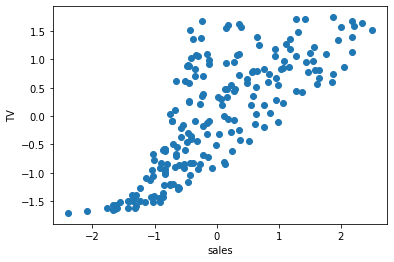

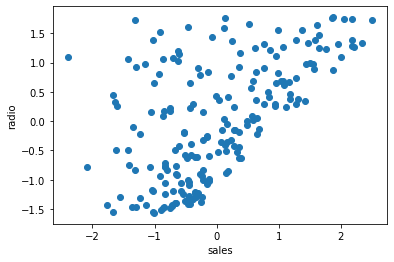

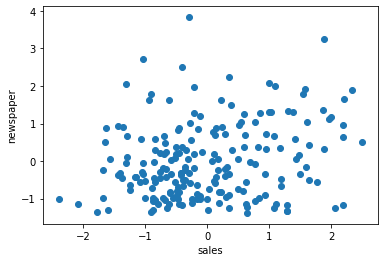

In [9]:
for i in df1.columns:
    plt.xlabel("sales")
    plt.ylabel(i)
    plt.scatter(df['sales'],df1[i])
    plt.show()

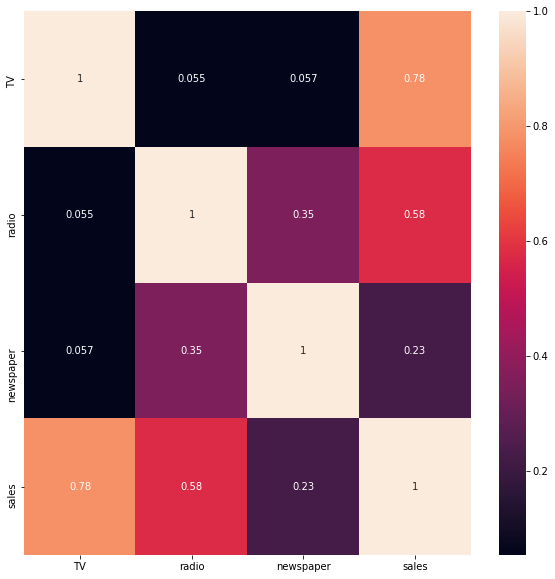

In [10]:
#3. Check for correlation and observe if there is  any multicollinearity.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

The corr() values between the input is always >0.75. corr() value between: TV and radio: 0.054 TV and newspaper: 0.056 radio and newspaper: 0.354 Therefore, no input columns are correlated so there is no multicollinearity.

In [11]:
#4. After building a Linear Regression Model, write down the interpretation of the model
X=df.drop(['sales'],axis=1)
y=df.sales
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lr.intercept_)
print(lr.coef_)

0.001162087460638478
[0.77081214 0.50806629 0.01079522]


Interpretation of the model: The regression line of the model, makes an intercept on the y-axis at 0.001162087460638478 and the coef of the inputs respectively are: [0.77081214, 0.50806629, 0.01079522] and the effect of the inputs TV, Radio and newpaper on Sales respectively are in the order: TV > Radio > Newspaper Therefore, it can be interpreted that the model thinks that the amount spent on TV commercials, is of great significance as it brings in much more sales than any other Media. Radio is also moderately useful but not greater than TV

In [14]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

Text(0.5, 1.0, 'Training Data')

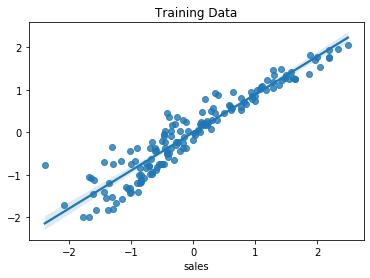

In [15]:
#5. Find out how well does the model fit the data?
#first, lets visualise the actual values and the predictions using regplot
#Graphical Method for preedicting model accuracy
sns.regplot(y_train,y_train_pred)
plt.title('Training Data')

it can be observed that the model is working good, and that there is not much differnce between the ACTUAL and PREDICTED values of the training data. This can be inferred from the graph by noticing that there are less residual values(the values that are far away from the reg line), indicating minimal error in the prediction

Text(0.5, 1.0, 'Testing Data')

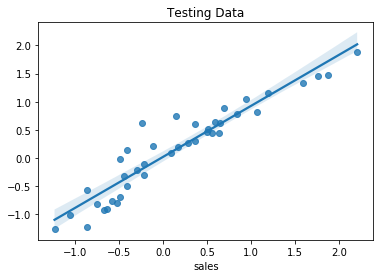

In [16]:
sns.regplot(y_test,y_test_pred)
plt.title('Testing Data')

The model appears to work with almost same accuracy, and, there is not much difference between the ACTUAL and PREDICTED values of the testing data. This can be infered from the data ny noticing that the residual values are pretty less, indicating minimal error in the prediction.

In [17]:
#check the accuracy using metrics:
print('Training Metrics:\n')
print('R2 score: ',r2_score(y_train,y_train_pred))
print('Adjusted R2 score: ',1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                  (len(X_train)-X_train.shape[1]-1))
print('MAE: ',mean_absolute_error(y_train,y_train_pred))
print('MSE: ',mean_squared_error(y_train,y_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nTesting Metrics:\n')
print('R2 score:', r2_score(y_test,y_test_pred))
print('Adjusted R2 score:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training Metrics:

R2 score:  0.8959372632325174
Adjusted R2 score:  0.8939360567562197
MAE:  0.2553322418777194
MSE:  0.11138075570325359
RMSE:  0.3337375551286573

Testing Metrics:

R2 score: 0.8927605914615384
Adjusted R2 score: 0.8838239740833332
MAE: 0.19987243199696364
MSE: 0.07353999839228301
RMSE 0.27118259234744957


From the above R2 scores of TRAIN and TEST data: It can be inferred that the model has an 89% accuracy in predicting Training data and an 88% accuracy in predicting Testing data. From the above values of the RMSE of TRAIN and TEST data: It can be infered that the model has an error magnitude of 0.33 for Training data and an error magnitude of 0.27 fro Testing data.